In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
%matplotlib inline

In [2]:
os.chdir('C:\Digital Engineering\Gender Detection')

In [3]:
data = np.load('./data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [4]:
X=data['arr_0']
y=data['arr_1']
mean=data['arr_2']

# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4372, 50), (1093, 50), (4372,), (1093,))

# Training the model

In [7]:
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='rbf', gamma=0.01, probability=True)

In [8]:
model.fit(X_train, y_train)
print('model trained successfully')

model trained successfully


In [9]:
# score
model.score(X_train,y_train)

0.854071363220494

In [10]:
# score
model.score(X_test,y_test)

0.8161024702653248

# Model Evaluation

In [11]:
from sklearn import metrics

In [12]:
y_pred= model.predict(X_test)
y_prob= model.predict_proba(X_test)

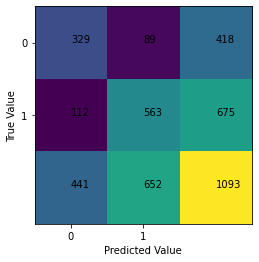

In [13]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm=np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
#plt.imshow(cm)

for i in range (3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])

plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.imshow(cm)

In [14]:
# classification Report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.787081,0.746032,0.766007,441.000000
female,0.834074,0.863497,0.848531,652.000000
accuracy,0.816102,0.816102,0.816102,0.816102
macro avg,0.810578,0.804764,0.807269,1093.000000
weighted avg,0.815114,0.816102,0.815234,1093.000000


In [15]:
# kappa 
metrics.cohen_kappa_score(y_test,y_pred)

0.6147163067706516

## ROC and AUC

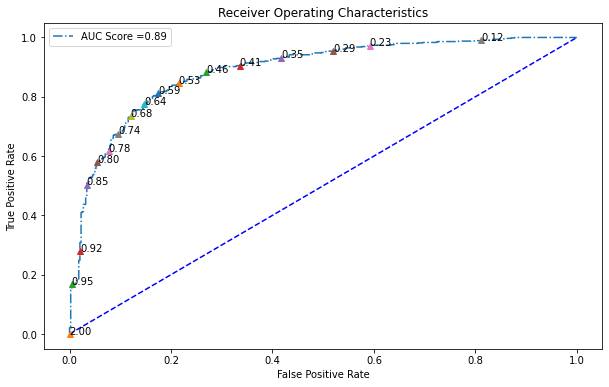

In [16]:
# roc for female
fpr, tpr, thresh= metrics.roc_curve(y_test,y_prob[:,1])
auc_s= metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))

plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')

plt.legend(['AUC Score =%0.2f'%auc_s])

for i in range (0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

In [17]:
## Hyper parameter tuning

In [18]:
model_tune=SVC()

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid= {'C':[1,10,20,30,40,50,100],
            'kernel':['rbf','poly'],
            'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
            'coef0':[0,1]
            }

In [21]:
model_grid=GridSearchCV(model_tune,param_grid,scoring='accuracy',cv=5,verbose=1)

In [22]:
model_grid.fit(X,y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [23]:
model_grid.best_params_

{'C': 100, 'coef0': 0, 'gamma': 0.001, 'kernel': 'rbf'}

In [24]:
model_grid.best_score_

0.7868252516010978

In [25]:
# With best parameter build ML model
model_best= SVC (C=100, kernel='rbf',gamma=0.001,coef0=0,probability=True)

In [26]:
model_best.fit(X_train,y_train)

SVC(C=100, coef0=0, gamma=0.001, probability=True)

In [ ]:
model_best.score(X_train,y_train)

In [27]:
model_best.score(X_test,y_test)

0.8051235132662397

# Model Evaluation

In [28]:
y_pred= model_best.predict(X_test)
y_prob= model_best.predict_proba(X_test)

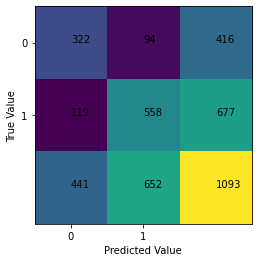

In [29]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm=np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
#plt.imshow(cm)

for i in range (3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])

plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.imshow(cm)

In [30]:
# classification Report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.774038,0.730159,0.751459,441.000000
female,0.824225,0.855828,0.839729,652.000000
accuracy,0.805124,0.805124,0.805124,0.805124
macro avg,0.799131,0.792993,0.795594,1093.000000
weighted avg,0.803976,0.805124,0.804114,1093.000000


In [31]:
# kappa 
metrics.cohen_kappa_score(y_test,y_pred)

0.5914119086188045

## ROC and AUC

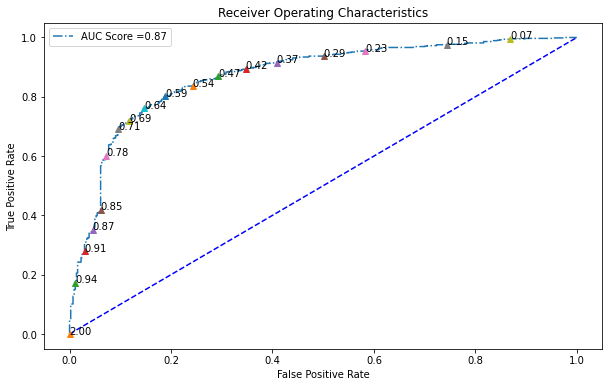

In [32]:
# roc for female
fpr, tpr, thresh= metrics.roc_curve(y_test,y_prob[:,1])
auc_s= metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))

plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')

plt.legend(['AUC Score =%0.2f'%auc_s])

for i in range (0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

In [33]:
# save our machine learning model
import pickle

In [34]:
pickle.dump(model_best,open('model_svm.pickle','wb'))

In [37]:
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))